# ICU motality prediction - Udemy

https://www.udemy.com/course/data-science-in-healthcare/

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [20]:
df = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/icu mortality prediction/train.csv', encoding='utf-8')
labels = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/icu mortality prediction/labels.csv', encoding='utf-8')

In [21]:
print(df.head())
print(df.shape)

     ALP   ALT    AST  Age   Albumin        BUN  Bilirubin  Cholesterol  \
0   77.0  31.0   46.0   54  2.973333  10.500000        0.7        154.0   
1   77.0  31.0   46.0   76  2.973333  18.333333        0.7        154.0   
2  116.0  83.0  199.5   44  2.500000   4.666667        2.9        154.0   
3  105.0  12.0   15.0   68  4.400000  17.666667        0.2        154.0   
4   77.0  31.0   46.0   88  3.300000  35.000000        0.7        154.0   

   Creatinine    DiasABP  ...   RespRate       SaO2      SysABP       Temp  \
0    0.750000  58.795833  ...  17.428571  97.250000  116.891892  37.357143   
1    1.100000  58.897059  ...  19.000000  96.833333  113.411765  36.939130   
2    0.333333  67.125000  ...  19.000000  95.000000  125.687500  37.800000   
3    0.766667  58.795833  ...  15.457627  97.250000  116.891892  36.223077   
4    1.000000  58.795833  ...  19.166667  97.250000  116.891892  36.880000   

   TroponinI  TroponinT       Urine        WBC     Weight        pH  
0        2

In [22]:
#df = pd.concat([df, labels], axis=1)

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [24]:
# one hot encode the labels
y = []
for i in labels['In-hospital_death']:
    if i == 0:
        y.append([1,0])
    else:
        y.append([0,1])
y = np.array(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3199, 42) (3199, 2) (800, 42) (800, 2)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [33]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 130       
Total para

In [34]:
history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))




Train on 3199 samples, validate on 800 samples
Epoch 1/15





3199/3199 [==============================] - 7s 2ms/step - loss: 0.6843 - acc: 0.5883 - val_loss: 0.5817 - val_acc: 0.7594
Epoch 2/15
3199/3199 [==============================] - 0s 133us/step - loss: 0.5040 - acc: 0.8217 - val_loss: 0.4379 - val_acc: 0.8381
Epoch 3/15
3199/3199 [==============================] - 1s 168us/step - loss: 0.3920 - acc: 0.8629 - val_loss: 0.3592 - val_acc: 0.8719
Epoch 4/15
3199/3199 [==============================] - 0s 127us/step - loss: 0.3497 - acc: 0.8650 - val_loss: 0.3535 - val_acc: 0.8500
Epoch 5/15
3199/3199 [==============================] - 0s 131us/step - loss: 0.3318 - acc: 0.8681 - val_loss: 0.3464 - val_acc: 0.8650
Epoch 6/15
3199/3199 [==============================] - 1s 159us/step - loss: 0.3290 - acc: 0.8673 - val_loss: 0.3281 - val_acc: 0.8688
Epoch 7/15
3199/3199 [==============================] - 0s 104us/step - loss: 0.3267 - acc: 0.8723 - val_loss: 0.3542 - val_acc: 0.

In [35]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


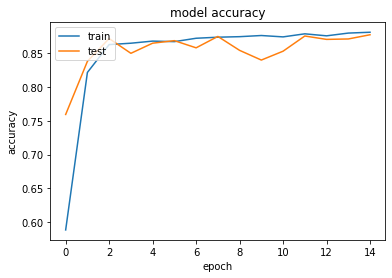

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

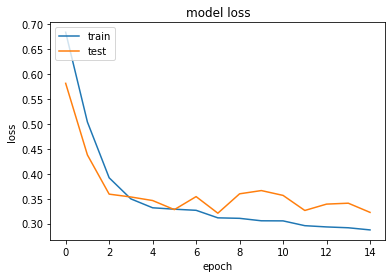

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [43]:
print(accuracy_score(y_true, pred))

0.87625


In [51]:
tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel()
print(tn, fp, fn, tp)

681 21 78 20


In [52]:
acc = (tn+tp) / (tn+fp+fn+tp)
acc

0.87625